In [ ]:
# Clone whole github repository with necessary files
!git clone https://github.com/stereifberger/logical_derivations_with_transformers
!cd /content/logical_derivations_with_transformers

In [1]:
# Import libraries
import sys
sys.path.append('logical_derivations_with_transformers')
from imports import *

In [56]:
importlib.reload(train_test)

<module 'train_test' from '/home/str/logical_derivations_with_transformers/train_test.py'>

In [ ]:
# Set random seed for reproducibility
seed(42)
torch.manual_seed(42)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# Prepare data
total_samples = 80000
batch_size = 32
data_inputs, data_targets, max_input_len, max_target_len = utils.prepare_data(num_samples=total_samples)
t_nu = 5
vocab_size = t_nu + 11  # Number of symbols including PAD, SOS, EOS
inputs_train, inputs_test, targets_train, targets_test = train_test_split(
    data_inputs, data_targets, test_size=0.2, random_state=42
)

# Construct data loader
train_data = list(zip(inputs_train, targets_train))
test_data = list(zip(inputs_test, targets_test))
train_data_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, collate_fn=train_test.collate_batch)
test_data_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True, collate_fn=train_test.collate_batch)

In [5]:
# Model parameters
input_dim = vocab_size
output_dim = vocab_size
emb_dim = 256
num_heads = 8
hidden_dim = 512
num_layers = 3
dropout = 0.1

# Check for avaiable GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if torch.cuda.is_available():
    print("Using CUDA")
else:
    print("Using CPU")

# Initialize the model
encoder = architectures.TransformerEncoder(input_dim, emb_dim, num_heads, hidden_dim, num_layers, dropout, max_seq_len=max_input_len)
decoder = architectures.TransformerDecoder(output_dim, emb_dim, num_heads, hidden_dim, num_layers, dropout, max_seq_len=max_target_len)
model = architectures.Seq2SeqTransformer(encoder, decoder, device).to(device)

Using CUDA


/home/str/environments/general/lib/python3.10/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


NameError: name 'device' is not defined

Epoch 1/2: Train Loss: 0.6283, Train Accuracy: 0.1183, Test Loss: 0.5253, Test Accuracy: 0.1255
Epoch 2/2: Train Loss: 0.5191, Train Accuracy: 0.1258, Test Loss: 0.3953, Test Accuracy: 0.1341


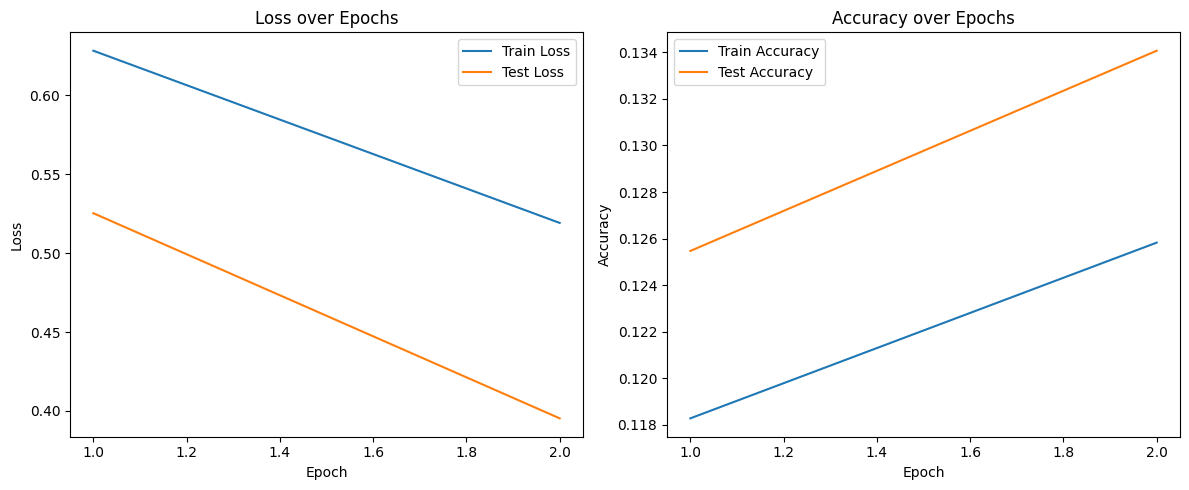

In [57]:
# Train the model
model = train_test.train_test_model(model, train_data_loader, test_data_loader, num_epochs=2, learning_rate=1e-4)

In [47]:
# Test the model
train_test.test_model(model, test_data_loader, num_epochs=10, learning_rate=1e-4)

Premises and Conclusion:
Premise: t
Conclusion: (t ∨ p)

Predicted Derivation Steps:
t
